In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

plt.rcParams['figure.figsize'] = [12,4]

#Load diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

# LOADING DATASET

In [12]:
#sklearn has broken the data into attributes (facts or knowledges used to make predictions) and targets
diabetes_X, diabetes_y = diabetes.data, diabetes.target

diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


# Creating old man feature

In [16]:
# a feature is a custom attribute (combination, for example) used to help out the modeling
diabetes_X['old_man']= (diabetes_X['sex']>0) & (diabetes_X['age']>0.05)
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,old_man
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,False
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,False
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,True
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,False
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,False


<AxesSubplot:>

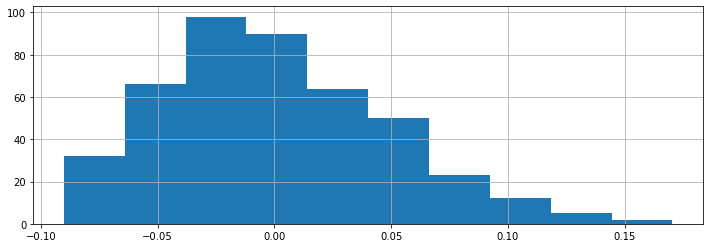

In [18]:
#Feature with continuous values --> It can take any value in the real space
diabetes_X.loc[:,'bmi'].hist()

<AxesSubplot:>

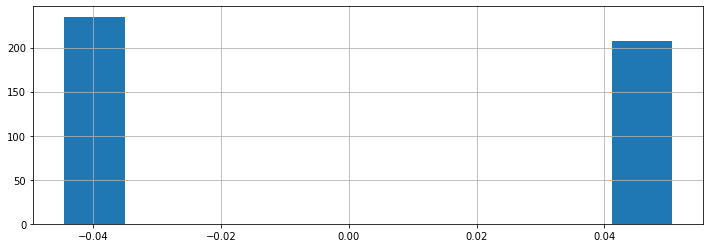

In [19]:
#Feature with discrete values --> It can only take given certain given values
#Female and male have these weird values because the data was normalized to have mean = 0!
diabetes_X.loc[:,'sex'].hist()

# Peaking into target

<AxesSubplot:xlabel='Diabetes risk score', ylabel='Number of patients'>

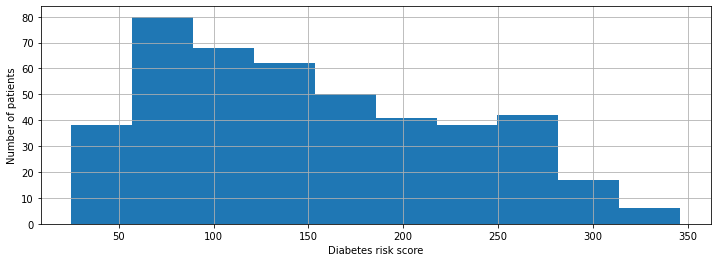

In [20]:
plt.xlabel('Diabetes risk score')
plt.ylabel('Number of patients')
diabetes_y.hist()

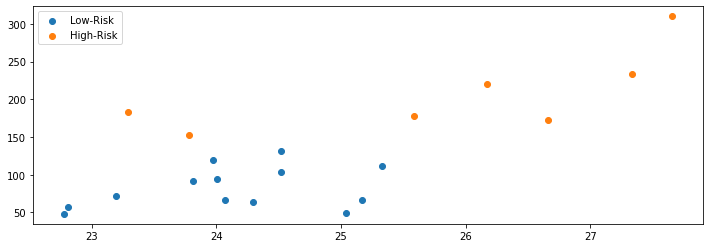

In [40]:
#Supervised learning algorithms can be split into 

#--> Regression: Target variable is continous, e.g. bmi score
#--> Classification: Target is discret, e.g. wine classification, identifying the cat.


diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)
diabetes_X = diabetes_X.loc[:,['bmi']]
#the bmi is zero-centered and localized; recenter for presentation sake
diabetes_X = diabetes_X*30+25

#Transform the regression problem from previous lesson into a classification problem!
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]
diabetes_y_train_discr = np.digitize(diabetes_y_train, bins =[150])


#Visualization
plt.scatter(diabetes_X_train[diabetes_y_train_discr==0], diabetes_y_train[diabetes_y_train_discr==0])
plt.scatter(diabetes_X_train[diabetes_y_train_discr==1], diabetes_y_train[diabetes_y_train_discr==1])
plt.legend(['Low-Risk','High-Risk'])

# Trying to generate predictions

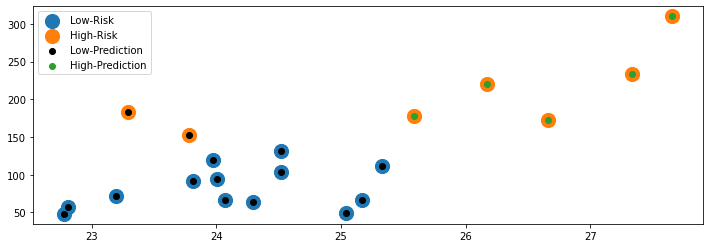

In [56]:
#Create logistic regression object (note: this is actually a classification algorithm)
from sklearn import linear_model

clf = linear_model.LogisticRegression()

#Train the model using the training sets
clf.fit(diabetes_X_train, diabetes_y_train_discr)

#Make predictions on the training set
diabetes_y_train_pred = clf.predict(diabetes_X_train)

#Visualization
plt.scatter(diabetes_X_train[diabetes_y_train_discr==0], diabetes_y_train[diabetes_y_train_discr==0], marker = "o", s=200)
plt.scatter(diabetes_X_train[diabetes_y_train_discr==1], diabetes_y_train[diabetes_y_train_discr==1], marker = "o", s=200)
plt.scatter(diabetes_X_train[diabetes_y_train_pred==0], diabetes_y_train[diabetes_y_train_pred==0], color = "black")
plt.scatter(diabetes_X_train[diabetes_y_train_pred==1], diabetes_y_train[diabetes_y_train_pred==1])
plt.legend(['Low-Risk','High-Risk','Low-Prediction','High-Prediction'])